In [1]:
# Se importan las librerias necesarias
import pandas as pd
import numpy as np 
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
pd.set_option('display.max_columns', None)

### Homicidios pestaña HECHOS

Se carga el excel homicidios, la pestaña Hechos

In [2]:
# Se cargan los datos
homicidios_hechos = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')
homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Se revisa si hay valores nulos y faltantes

In [3]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [4]:
homicidios_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Se filtra el dataframe para observar mejor los datos faltantes en la columna Cruce

In [5]:
homicidios_hechos[homicidios_hechos['Cruce'].isnull()][['LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Cruce']].head()

,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Cruce
2,AV ENTRE RIOS 2034,AVENIDA,NaN
9,AV ENTRE RIOS 1366,AVENIDA,NaN
14,SUIPACHA 156,CALLE,NaN
33,LIMA 1483,CALLE,NaN
35,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,NaN


Ahora se muestran los valores no nulos de la columna Cruce

In [6]:
homicidios_hechos[['LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Cruce']].head()

,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Cruce
0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,"FERNANDEZ DE LA CRUZ, F., GRAL. AV."
1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,DE LOS CORRALES AV.
2,AV ENTRE RIOS 2034,AVENIDA,NaN
3,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,"VILLEGAS, CONRADO, GRAL."
4,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,"SAENZ PE?A, LUIS, PRES."


Se filtra el dataframe para ver el valor faltante en la columna calle

In [7]:
homicidios_hechos[pd.isna(homicidios_hechos['Calle'])]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Se filtra el dataframe para ver los valores faltantes de la columna Dirección Normalizada

In [8]:
homicidios_hechos[pd.isna(homicidios_hechos['Dirección Normalizada'])]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


Se cuentan la cantidad de datos que tienen puntos y en que columnas estan

In [9]:
busqueda_point = homicidios_hechos.apply(lambda x: x.map(lambda y: str(y) == '.')).sum()
busqueda_point

ID                        0
N_VICTIMAS                0
FECHA                     0
AAAA                      0
MM                        0
DD                        0
HORA                      0
HH                        0
LUGAR_DEL_HECHO           0
TIPO_DE_CALLE             0
Calle                     0
Altura                    0
Cruce                     0
Dirección Normalizada     0
COMUNA                    0
XY (CABA)                 0
pos x                    12
pos y                    12
PARTICIPANTES             0
VICTIMA                   0
ACUSADO                   0
dtype: int64

Solo las columnas pos x y poy tienen puntos, se hace un filtro para ver mejor que se puede hacer con estos valores

In [10]:
homicidios_hechos[homicidios_hechos['pos x'] == '.']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,"LUGONES, LEOPOLDO AV.",NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,AUTOPISTA PERITO MORENO,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,"LUGONES, LEOPOLDO AV.",NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


Se puede observar que la columna XY (CABA) no tiene valores

**Teniendo en cuenta lo anterior:**
1. La columna Altura se borra ya que hay demasiados valores faltantes <br>
2. Revisando la columna cruce, al parecer los datos faltantes es porque el accidente no ocurrio en un cruce, por eso se cambian los valores <br> 
de la columna por **'Si'** y **'No'**, **'Si'** donde hay datos y **'No'** donde no hay datos.
3. Los valores faltantes en las columnas Calle y Dirección Normalizada se imputan somo SD es decir sin dato.
4. Para las columnas pos x y pos y con valores faltantes se imputan con un valor de 0
5. Parala columna XY (CABA) con valores Point (. .) se imputan tsambien como 0


In [11]:
homicidios_hechos = homicidios_hechos.drop('Altura', axis=1)
homicidios_hechos['Cruce'] = homicidios_hechos['Cruce'].apply(lambda x: 'Sí' if pd.notna(x) else 'No')
homicidios_hechos[['Calle','Dirección Normalizada']] = homicidios_hechos[['Calle','Dirección Normalizada']].fillna("SD")
homicidios_hechos['pos x'] = homicidios_hechos['pos x'].replace('.', 0)
homicidios_hechos['pos y'] = homicidios_hechos['pos y'].replace('.', 0)
homicidios_hechos['XY (CABA)'] = homicidios_hechos['XY (CABA)'].replace('Point (. .)', 0)
homicidios_hechos.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Sí,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",Sí,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,Sí,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,Sí,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


Se estandariza el nombre de las columnas y tambien se les cambia el nombre algunas para hacerlo mas claro.

In [12]:
homicidios_hechos.columns = homicidios_hechos.columns.str.capitalize()
nuevos_nombres = {'N_victimas': 'Cantidad de Victimas', 'Aaaa': 'Año', 'Mm': 'Mes', 'Dd': 'Dia', 'Hh': 'Hora Entera', 'Xy (caba)': 'XY (CABA)'}
homicidios_hechos = homicidios_hechos.rename(columns=nuevos_nombres)
homicidios_hechos.head()


,Id,Cantidad de Victimas,Fecha,Año,Mes,Dia,Hora,Hora Entera,Lugar_del_hecho,Tipo_de_calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Sí,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",Sí,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,Sí,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,Sí,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


1. Se verifica si hay filas duplicadas
2. Se verifica que solo hay un Id para cada fila

In [13]:
print("Hay", homicidios_hechos.duplicated().sum(), "duplicados")
print("Las dimensiones del Dataframe son :", homicidios_hechos.shape)
print("Hay", homicidios_hechos.Id.nunique(), "Id unicos en el Dataframe")

Hay 0 duplicados
Las dimensiones del Dataframe son : (696, 20)
Hay 696 Id unicos en el Dataframe


In [14]:
homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     696 non-null    object        
 1   Cantidad de Victimas   696 non-null    int64         
 2   Fecha                  696 non-null    datetime64[ns]
 3   Año                    696 non-null    int64         
 4   Mes                    696 non-null    int64         
 5   Dia                    696 non-null    int64         
 6   Hora                   696 non-null    object        
 7   Hora Entera            696 non-null    object        
 8   Lugar_del_hecho        696 non-null    object        
 9   Tipo_de_calle          696 non-null    object        
 10  Calle                  696 non-null    object        
 11  Cruce                  696 non-null    object        
 12  Dirección normalizada  696 non-null    object        
 13  Comun

AL intentar hacer el cambio de la columna Hora a tipo datetime se pude evidenciar que hay un valor SD que hay que arreglar, <br>
no solo en esa columna, tambien en Hora Entera


In [15]:
homicidios_hechos[homicidios_hechos['Hora'] == "SD"]

,Id,Cantidad de Victimas,Fecha,Año,Mes,Dia,Hora,Hora Entera,Lugar_del_hecho,Tipo_de_calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",Sí,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Se toma la decision de imputar la columna Hora con la moda y de ahi se toma el valor para la columna Hora Entera

In [16]:
moda_hora = homicidios_hechos['Hora'][homicidios_hechos['Hora'] != "SD"].mode()[0]
homicidios_hechos['Hora'] = np.where(homicidios_hechos['Hora'] == "SD", moda_hora, homicidios_hechos['Hora'])
moda_hora_entera = moda_hora.hour
homicidios_hechos.loc[homicidios_hechos['Hora Entera'] == 'SD', 'Hora Entera'] = moda_hora_entera

In [17]:
# Se revisa el resultado
homicidios_hechos[homicidios_hechos['Id']=='2019-0103']

,Id,Cantidad de Victimas,Fecha,Año,Mes,Dia,Hora,Hora Entera,Lugar_del_hecho,Tipo_de_calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado
518,2019-0103,1,2019-12-18,2019,12,18,14:00:00,14,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,"PAZ, GRAL. AV.",Sí,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


Se revisan las columnas Victima y Acusado

In [18]:
homicidios_hechos['Victima'].unique()


array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [19]:
homicidios_hechos['Acusado'].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

Revisando los valores de las columnas hay unos que no aparecen en el diccionario proporcionado, como es el caso de <br>
'OBJETO FIJO', 'PEATON_MOTO' de la columna Victima. <br> 
Se procede entonces a cambiar estos valores por un valor que si aparece en el diccionario que es otro.

In [20]:
homicidios_hechos['Victima'] = homicidios_hechos['Victima'].replace({'OBJETO FIJO': 'OTRO', 'PEATON_MOTO': 'OTRO'})
homicidios_hechos['Victima'].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OTRO'], dtype=object)

### Homicidios pestaña VICTIMAS

In [21]:
# Se cargan los datos
homicidios_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')
homicidios_victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00


Se revisa si hay valores nulos o faltantes

In [22]:
homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [23]:
homicidios_victimas.apply(lambda x: x == '').sum()


ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

1. Se verifica si hay filas duplicadas
2. Se verifica que solo hay un Id para cada fila

In [24]:
print("Cantidad de filas duplicadas", homicidios_victimas.duplicated().sum())

Cantidad de filas duplicadas 0


In [25]:
homicidios_victimas[homicidios_victimas.duplicated(subset=['ID_hecho'])]

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
99,2016-0126,2016-09-18,2016,9,18,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,60,SD
164,2017-0026,2017-02-26,2017,2,26,CONDUCTOR,AUTO,MASCULINO,19,2017-02-26 00:00:00
174,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,32,2017-03-23 00:00:00
175,2017-0035,2017-03-23,2017,3,23,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,30,2017-03-23 00:00:00
177,2017-0036,2017-03-29,2017,3,29,CONDUCTOR,MOTO,MASCULINO,20,2017-03-29 00:00:00
187,2017-0050,2017-04-28,2017,4,28,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,16,2017-04-28 00:00:00
238,2017-0108,2017-09-02,2017,9,2,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,10,2017-09-02 00:00:00
243,2017-0112,2017-09-10,2017,9,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,SD,2017-09-13 00:00:00
254,2017-0126,2017-10-14,2017,10,14,CONDUCTOR,AUTO,MASCULINO,36,2017-10-14 00:00:00


Hay ID_hecho repetidos pero al parecer se refieren al mismo hecho pero diferentes victimas

Se observaron algunos valores con "SD" sin dato, entonces se localizan por columnas para imputarlos 

In [26]:
homicidios_victimas.apply(lambda col: col.map(lambda x: 1 if x == 'SD' else 0)).sum()

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                    11
VICTIMA                 9
SEXO                    6
EDAD                   53
FECHA_FALLECIMIENTO    68
dtype: int64

En las columnas ROL, VICTIMA y SEXO se imputan los valores mas frecuentes pues son muy pocos los que no tienen datos.

In [27]:
# Se calcula la moda para cada columna
moda_rol = homicidios_victimas.ROL.mode().iloc[0]
moda_vict = homicidios_victimas.VICTIMA.mode().iloc[0]
moda_sexo = homicidios_victimas.SEXO.mode().iloc[0]

# Se imputan los valores
homicidios_victimas['ROL'] = homicidios_victimas['ROL'].replace('SD', moda_rol)
homicidios_victimas['VICTIMA'] = homicidios_victimas['VICTIMA'].replace('SD', moda_vict)
homicidios_victimas['SEXO'] = homicidios_victimas['SEXO'].replace('SD', moda_sexo)

Para la columna EDAD se imputa el promedio segun la columna SEXO

In [28]:
# Se filtra la columna edad pára poder calcular el promedio
homicidios_temp = homicidios_victimas[homicidios_victimas['EDAD'] != "SD"].copy()
homicidios_temp['EDAD'] = homicidios_temp['EDAD'].astype(int)
# Promedios
prom_fem = round(homicidios_temp[homicidios_temp['SEXO'] == 'FEMENINO']['EDAD'].mean())
prom_masc = round(homicidios_temp[homicidios_temp['SEXO'] == 'MASCULINO']['EDAD'].mean())

In [29]:
# Imputacion de valores
homicidios_victimas.loc[homicidios_victimas['SEXO'] == 'FEMENINO', 'EDAD'] = \
    homicidios_victimas.loc[homicidios_victimas['SEXO'] == 'FEMENINO', 'EDAD'].replace("SD", prom_fem)

homicidios_victimas.loc[homicidios_victimas['SEXO'] == 'MASCULINO', 'EDAD'] = \
    homicidios_victimas.loc[homicidios_victimas['SEXO'] == 'MASCULINO', 'EDAD'].replace("SD", prom_masc)


La fecha de fallecimiento no es una columna util para el analisis, se decide eliminar. <br>


In [30]:
homicidios_victimas = homicidios_victimas.drop('FECHA_FALLECIMIENTO', axis=1)

Se revisa nuevamente si quedaron valores "SD"

In [31]:
homicidios_victimas.apply(lambda col: col.map(lambda x: 1 if x == 'SD' else 0)).sum()

ID_hecho    0
FECHA       0
AAAA        0
MM          0
DD          0
ROL         0
VICTIMA     0
SEXO        0
EDAD        0
dtype: int64

Tambien se puede observar que hay varias columnas repetidas entre homicidios_victimas y homicidios_hechos las cuales se pueden eliminar

In [32]:
try:
    homicidios_victimas = homicidios_victimas.drop(['FECHA', 'AAAA', 'MM', 'DD', 'VICTIMA'], axis=1)
    print("Columnas eliminadas correctamente.")
except KeyError as e:
    print(f"Error: {e}")

Columnas eliminadas correctamente.


Se estandariza el nombre de las columnas

In [33]:
homicidios_victimas.columns = homicidios_victimas.columns.str.capitalize()
homicidios_victimas = homicidios_victimas.rename(columns={'Id_hecho': 'Id'})
homicidios_victimas

,Id,Rol,Sexo,Edad
0,2016-0001,CONDUCTOR,MASCULINO,19
1,2016-0002,CONDUCTOR,MASCULINO,70
2,2016-0003,CONDUCTOR,MASCULINO,30
3,2016-0004,CONDUCTOR,MASCULINO,18
4,2016-0005,CONDUCTOR,MASCULINO,29
...,...,...,...,...
712,2021-0092,PEATON,FEMENINO,50
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18
714,2021-0094,PASAJERO_ACOMPAÑANTE,FEMENINO,43
715,2021-0095,CONDUCTOR,MASCULINO,27


### Analisis Exploratorio de Datos

Se unen los dataframes para realizar el analisis de los datos.

In [34]:
df_accidentes = homicidios_hechos.merge(homicidios_victimas, on='Id', how='left')
df_accidentes.head() 

,Id,Cantidad de Victimas,Fecha,Año,Mes,Dia,Hora,Hora Entera,Lugar_del_hecho,Tipo_de_calle,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Victima,Acusado,Rol,Sexo,Edad
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,Sí,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,19
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",Sí,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,CONDUCTOR,MASCULINO,70
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,No,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO,CONDUCTOR,MASCULINO,30
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,Sí,"LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD,CONDUCTOR,MASCULINO,18
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,Sí,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS,CONDUCTOR,MASCULINO,29


In [35]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     717 non-null    object        
 1   Cantidad de Victimas   717 non-null    int64         
 2   Fecha                  717 non-null    datetime64[ns]
 3   Año                    717 non-null    int64         
 4   Mes                    717 non-null    int64         
 5   Dia                    717 non-null    int64         
 6   Hora                   717 non-null    object        
 7   Hora Entera            717 non-null    object        
 8   Lugar_del_hecho        717 non-null    object        
 9   Tipo_de_calle          717 non-null    object        
 10  Calle                  717 non-null    object        
 11  Cruce                  717 non-null    object        
 12  Dirección normalizada  717 non-null    object        
 13  Comun

In [36]:
# Se cambia el tipo de columna 
df_accidentes[['Hora Entera', 'Edad']] = df_accidentes[['Hora Entera', 'Edad']].astype(int)

In [37]:
print("Hay", df_accidentes.duplicated().sum(), "filas duplicadas")

Hay 0 filas duplicadas


Se hace una diagrama de lineas para observar la cantidad de victimas por mes y año par ver si hay algun patron

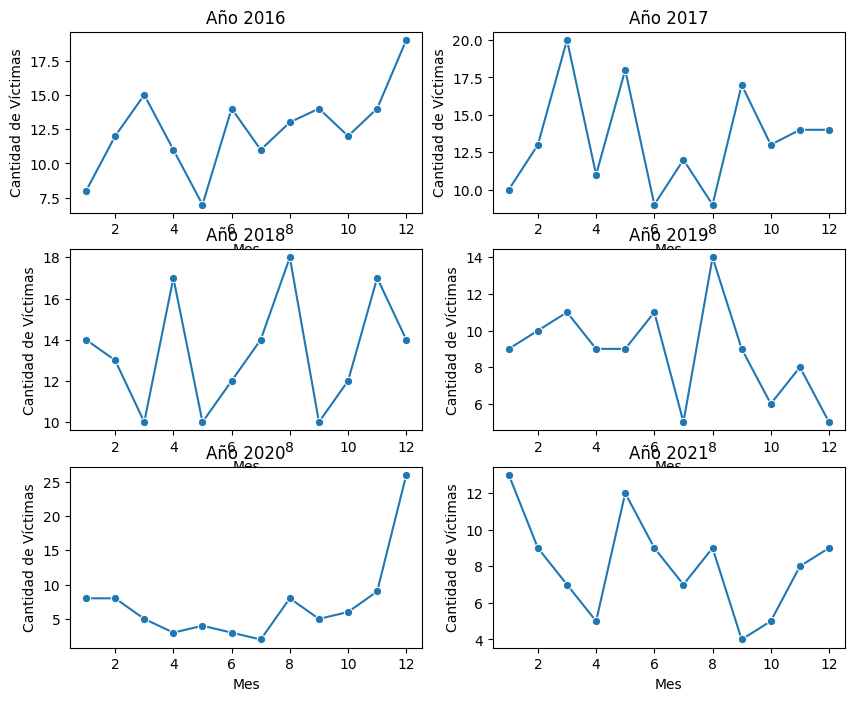

In [38]:
# Agrupar por Año y Mes, sumar la cantidad de víctimas
df_agrupado = df_accidentes.groupby(['Año', 'Mes'])['Cantidad de Victimas'].sum().reset_index()

# Crear gráficos separados por año utilizando subplots
años = df_agrupado['Año'].unique()

# Número de filas y columnas en la disposición de subgráficos
n_rows = 3
n_cols = 2

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 8))

for i, year in enumerate(años):
    row = i // n_cols
    col = i % n_cols
    
    data_year = df_agrupado[df_agrupado['Año'] == year]
    sns.lineplot(x='Mes', y='Cantidad de Victimas', data=data_year, marker='o', ax=axes[row, col])
    axes[row, col].set_title(f'Año {year}')
    axes[row, col].set_xlabel('Mes')
    axes[row, col].set_ylabel('Cantidad de Víctimas')

# Mostrar el gráfico
plt.show()

No hay un patron visible, se puede pensar que el mes de diciembre puede ser el de mas victimas. <br>
Por eso se hace un diagrama de barras para ver que meses que se presentan mas victimas.

Se hace un analisis de la cantidad de victimas por año, por meses y por dias, para tener un panorama general de estos datos. <br>

Analisis por Año

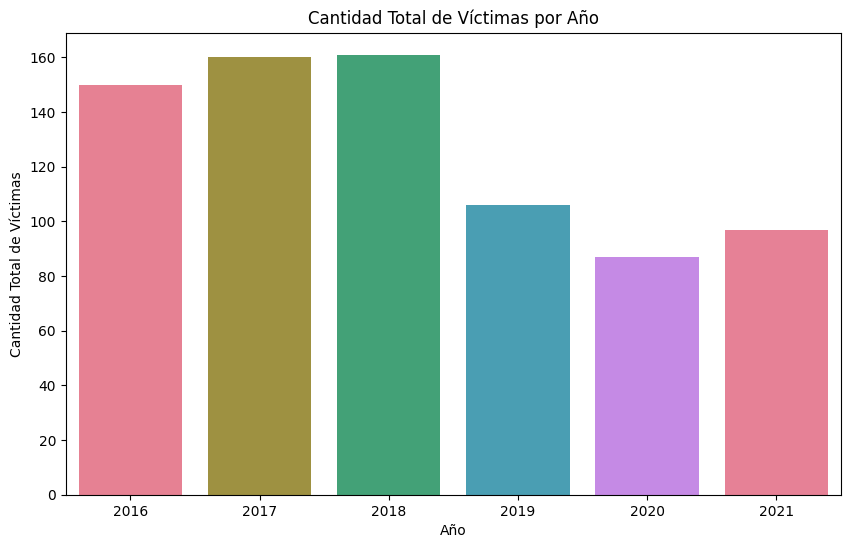

In [39]:
# Se agrupa por año y se suma la cantidad de víctimas
df_agrupado_1 = df_agrupado.groupby('Año')['Cantidad de Victimas'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Cantidad de Victimas', hue='Año', data=df_agrupado_1, palette='husl', dodge=False, order=df_agrupado_1['Año'].unique(), legend=False)
plt.title('Cantidad Total de Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad Total de Víctimas')
plt.show()

Se puede observar un descenso en la cantidad de victimas en los ultimos 3 años

In [40]:
df_agrupado.head()

,Año,Mes,Cantidad de Victimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,11
4,2016,5,7


Analisis por mes

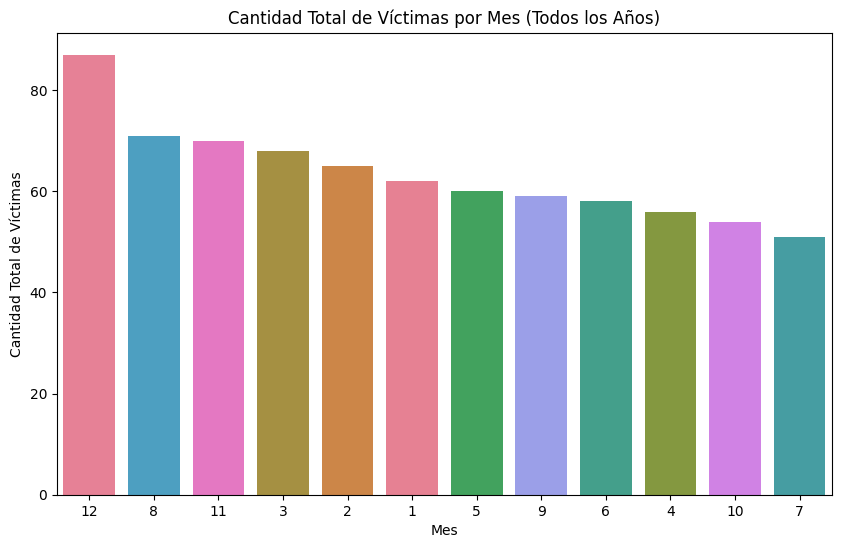

In [41]:
# Se agrupa por mes y se  suma la cantidad de víctimas
df_agrupado_2 = df_agrupado.groupby('Mes')['Cantidad de Victimas'].sum().reset_index()

# Ordenar el DataFrame por la cantidad de víctimas de mayor a menor
df_agrupado_2 = df_agrupado_2.sort_values(by='Cantidad de Victimas', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='Cantidad de Victimas', hue='Mes', data=df_agrupado_2, palette='husl', dodge=False, order=df_agrupado_2['Mes'].unique(), legend=False)
plt.title('Cantidad Total de Víctimas por Mes (Todos los Años)')
plt.xlabel('Mes')
plt.ylabel('Cantidad Total de Víctimas')
plt.show()

Se puede observar que los meses con mayor cantidad de victimas son Diciembre, Agosto y Noviembre. Los meses con menos victimas es Julio y Octubre

Analisis por dia de la semana

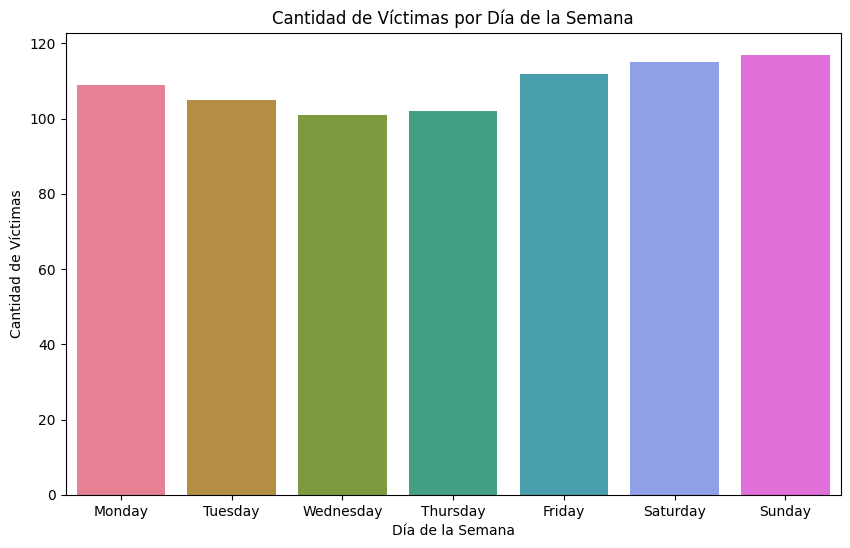

In [42]:
# Se extrae el dia de la semana
df_accidentes['Dia de la Semana'] = df_accidentes['Fecha'].dt.day_name()

# Se Mapea los nombres de los días a español utilizando el módulo calendar
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
nombres_dias_espanol = [calendar.day_name[dia] for dia in range(7)]

df_accidentes['Dia de la Semana'] = pd.Categorical(df_accidentes['Dia de la Semana'], categories=dias_ordenados, ordered=True)
df_accidentes['Dia de la Semana'] = df_accidentes['Dia de la Semana'].map(dict(zip(dias_ordenados, nombres_dias_espanol)))

# Agrupa por día de la semana y suma las víctimas
df_agrupado_3 = df_accidentes.groupby('Dia de la Semana', observed=False)['Cantidad de Victimas'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Dia de la Semana', y='Cantidad de Victimas', hue='Dia de la Semana', data=df_agrupado_3, palette='husl', dodge=False, legend=False)
plt.title('Cantidad de Víctimas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Víctimas')
plt.show()

Los dias del fin de semana Viernes, Sabado y Domingo es cuando hay mas victimas

Se hace un analisis por hora del dia

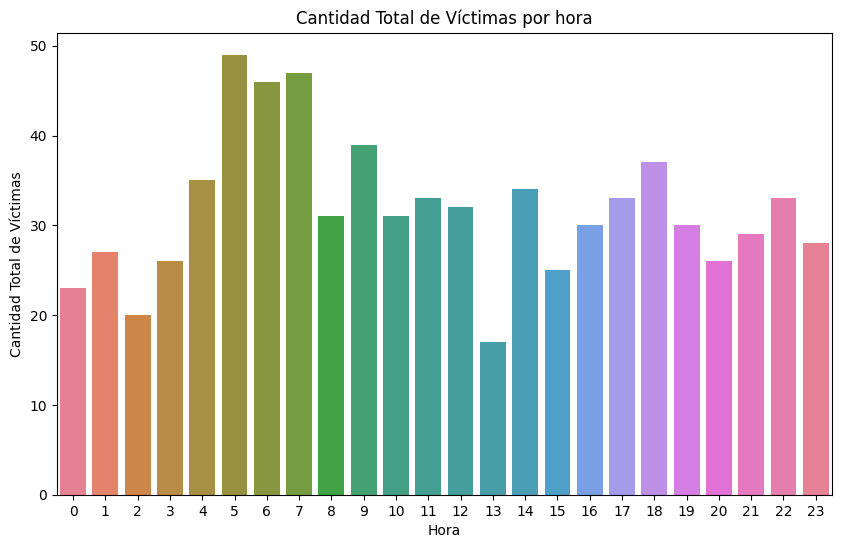

In [43]:
# Se agrupa por dia y se  suma la cantidad de víctimas
df_agrupado_3 = df_accidentes.groupby('Hora Entera')['Cantidad de Victimas'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Hora Entera', y='Cantidad de Victimas', hue='Hora Entera', data=df_agrupado_3, palette='husl', dodge=False, order=df_agrupado_3['Hora Entera'].unique(), legend=False)
plt.title('Cantidad Total de Víctimas por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad Total de Víctimas')
plt.show()

Teniendo en cuenta la distribucion de la cantidad total de victimas por hora, se decide hacer un analisis por intervalos de tiempo, <br>
de la siguiente manera: <br>
Madrugada desde 00:00:00 hasta 04:59:00 <br>
Mañana  desde 05:00:00  hasta 09:59:00 <br>
Medio dia desde 10:00:00 hasta 14:59:00 <br>
Tarde desde 15:00:00 hasta 19:59:00 <br>
Noche desde 20:00:00 hasta 23:59:00 <br>

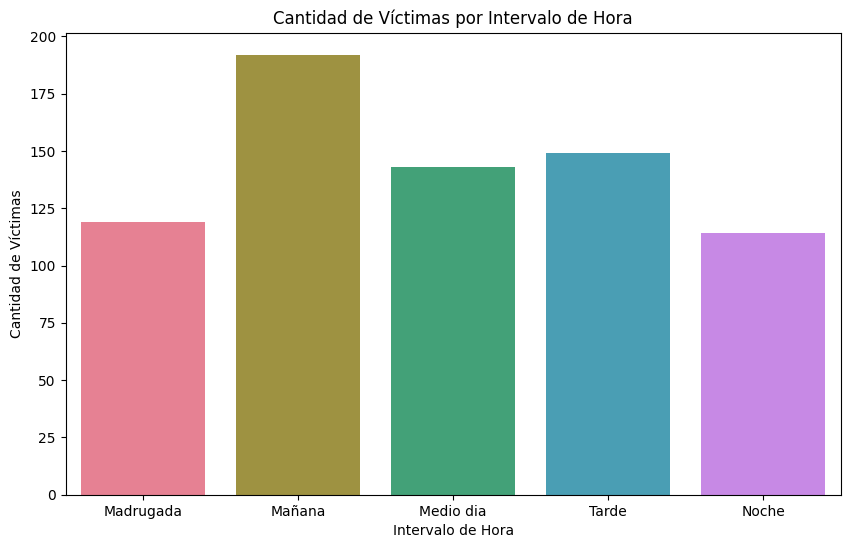

In [44]:
# Columna hora en formato datetime
df_accidentes['Hora'] = pd.to_datetime(df_accidentes['Hora'], format='%H:%M:%S')

# Se definen los intervalos
intervalos = {
    'Madrugada': ('00:00:00', '04:59:00'),
    'Mañana': ('05:00:00', '09:59:00'),
    'Medio dia': ('10:00:00', '14:59:00'),
    'Tarde': ('15:00:00', '19:59:00'),
    'Noche': ('20:00:00', '23:59:00'),
}

# Función para asignar el intervalo a cada hora
def asignar_intervalo(hora):
    for intervalo, (inicio, fin) in intervalos.items():
        if inicio <= hora <= fin:
            return intervalo

# Se aplica la función para crear la nueva columna 'Intervalo'
df_accidentes['Intervalo'] = df_accidentes['Hora'].dt.strftime('%H:%M:%S').apply(asignar_intervalo)

# Se agrupa por 'Intervalo' y se cuentan  las víctimas
df_agrupado_intervalo = df_accidentes.groupby('Intervalo')['Cantidad de Victimas'].count().reset_index()

# Se ordenan los intervalos
intervalos_ordenados = ['Madrugada', 'Mañana', 'Medio dia', 'Tarde', 'Noche']

# Se ordena  la columna 'Intervalo' según el orden deseado
df_agrupado_intervalo['Intervalo'] = pd.Categorical(df_agrupado_intervalo['Intervalo'], categories=intervalos_ordenados, ordered=True)
df_agrupado_intervalo = df_agrupado_intervalo.sort_values('Intervalo')


plt.figure(figsize=(10, 6))
sns.barplot(x='Intervalo', y='Cantidad de Victimas', data=df_agrupado_intervalo, palette='husl', hue='Intervalo', dodge=False, legend=False)
plt.title('Cantidad de Víctimas por Intervalo de Hora')
plt.xlabel('Intervalo de Hora')
plt.ylabel('Cantidad de Víctimas')
plt.show()

En los intervalos donde mas se presentan victimas es en la mañana 05:00:00', '09:59:00 y en la tarde 15:00:00', '19:59:00 <br>


Se va a mostrar ahora la informacion sobre el tipo de calle donde ocurrieron los accidentes

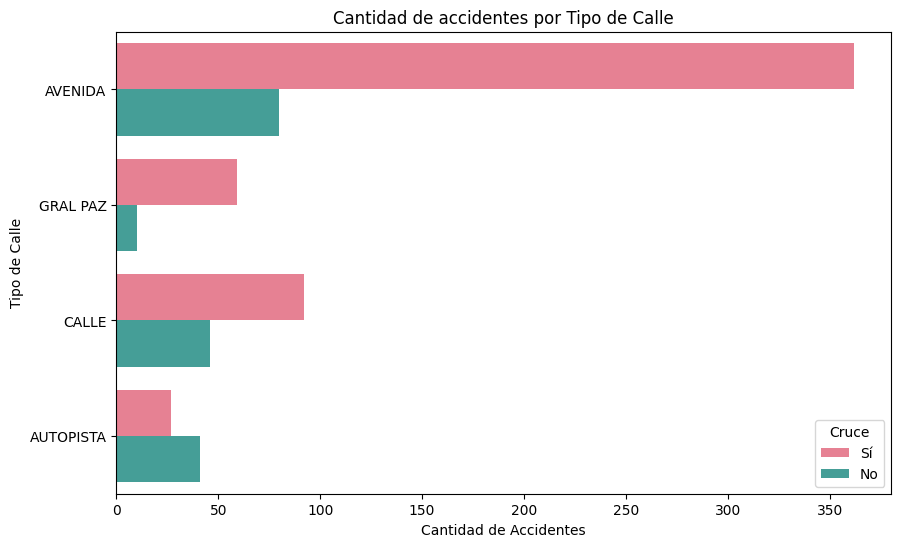

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Tipo_de_calle', data=df_accidentes, hue='Cruce', palette='husl', dodge=True, legend=True)
plt.title('Cantidad de accidentes por Tipo de Calle')
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Tipo de Calle')
plt.show()

La mayoria de accidentes ocurren en Avenida y sobre todo en los cruces.

Grafica para ver la cantidad de cada categoria de participante en el accidente

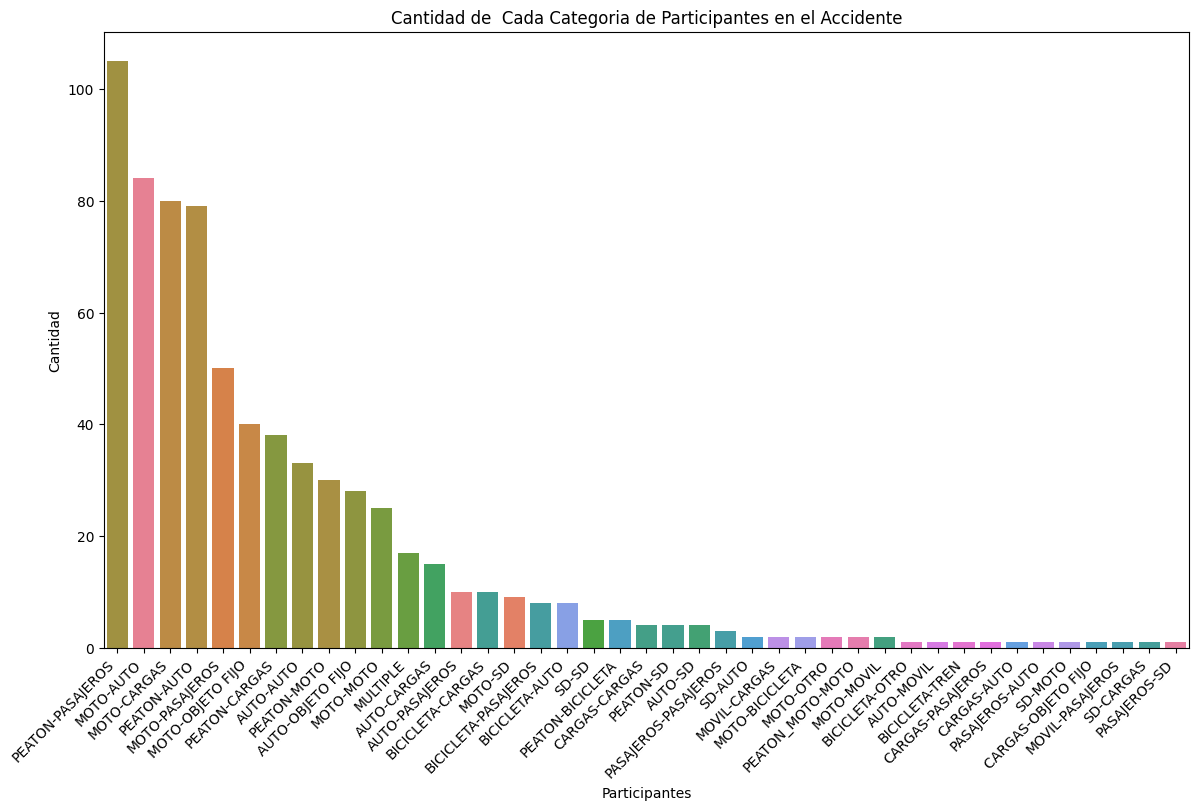

In [46]:
# Se ordenan las categorías de Participantes de mayor a menor frecuencia
orden_participantes = df_accidentes['Participantes'].value_counts().index

plt.figure(figsize=(14, 8))
sns.countplot(x='Participantes', data=df_accidentes, hue='Participantes', palette='husl', dodge=False, order=orden_participantes)

plt.title('Cantidad de  Cada Categoria de Participantes en el Accidente')
plt.xlabel('Participantes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

Grafica de la cantidad de cada categoria de 'Victimas' en los accidentes

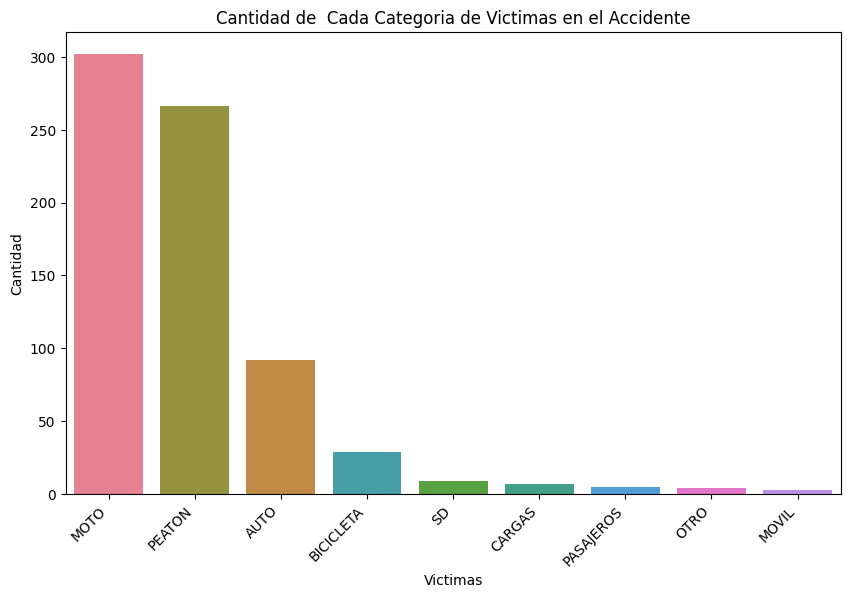

In [47]:
# Se ordenan las categorías de victimas de mayor a menor cantidad
orden_participantes = df_accidentes['Victima'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(x='Victima', data=df_accidentes, hue='Victima', palette='husl', dodge=False, order=orden_participantes)

plt.title('Cantidad de  Cada Categoria de Victimas en el Accidente')
plt.xlabel('Victimas')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

Las categorias de Victimas con mayor cantidad son **Moto, Peaton y Auto**

### Acusados

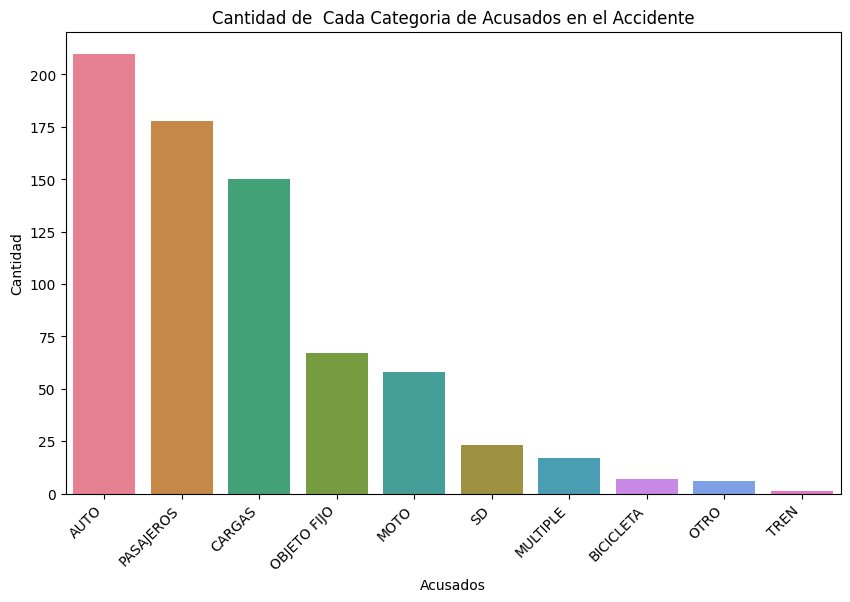

In [48]:
# Se ordenan las categorías de Acusado de mayor a menor cantidad
orden_participantes = df_accidentes['Acusado'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(x='Acusado', data=df_accidentes, hue='Acusado', palette='husl', dodge=False, order=orden_participantes)

plt.title('Cantidad de  Cada Categoria de Acusados en el Accidente')
plt.xlabel('Acusados')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

Las categorias de Acusados con mayor cantidad son **Auto, Pasajeros y Cargas**

### Victimas Vs Rol

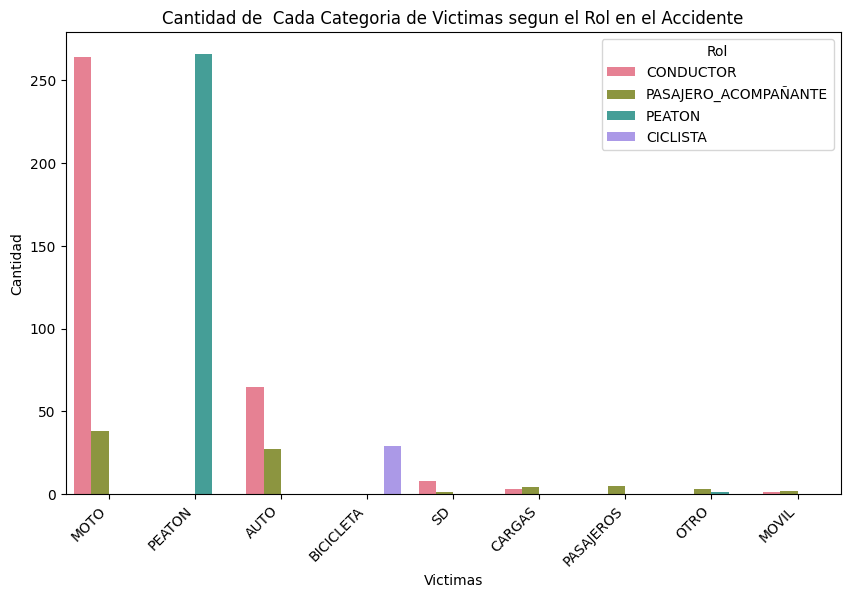

In [49]:
# Se ordenan las categorías de victimas de mayor a menor cantidad
orden_participantes = df_accidentes['Victima'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(x='Victima', data=df_accidentes, hue='Rol', palette='husl', dodge=True, order=orden_participantes)

plt.title('Cantidad de  Cada Categoria de Victimas segun el Rol en el Accidente')
plt.xlabel('Victimas')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

### Victimas Vs Sexo

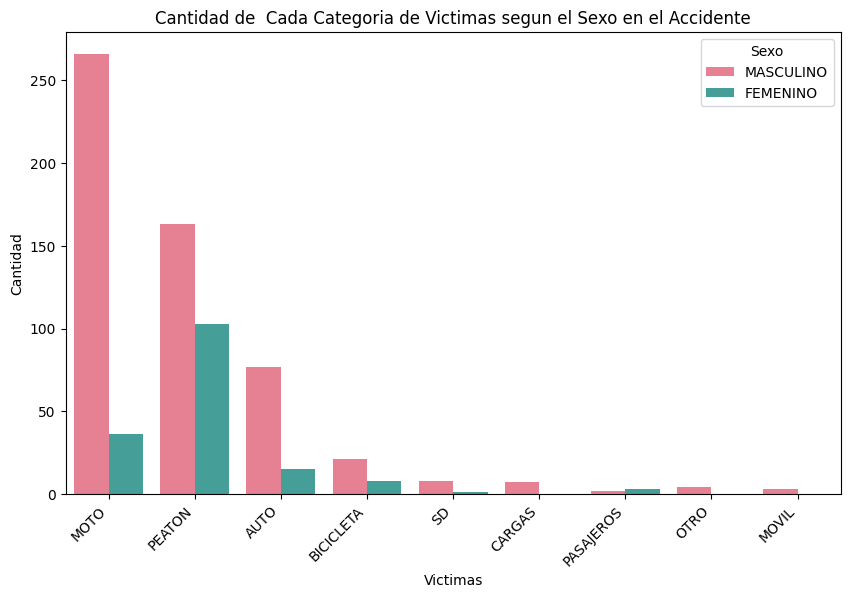

In [50]:
# Se ordenan las categorías de victimas de mayor a menor cantidad
orden_participantes = df_accidentes['Victima'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(x='Victima', data=df_accidentes, hue='Sexo', palette='husl', dodge=True, order=orden_participantes)

plt.title('Cantidad de  Cada Categoria de Victimas segun el Sexo en el Accidente')
plt.xlabel('Victimas')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.show()

### Edad las Victimas

Se hace un Boxplot para ver el intervalo de edades de las victimas

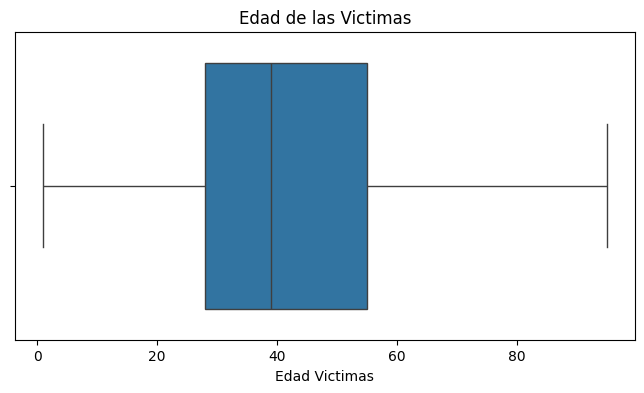

In [51]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Edad', data=df_accidentes)

plt.title('Edad de las Victimas')
plt.xlabel('Edad Victimas')
plt.show()

Las edades abarcan desde 1 año hasta mas de los 80 años

### Victimas Vs Edad

Se grafica ahora la edad y el vehiculo en el que iba la victima

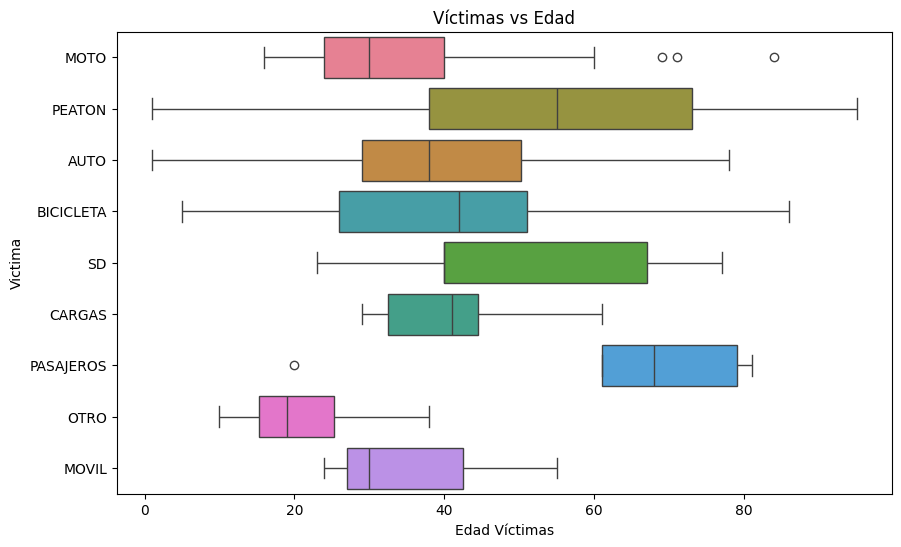

In [52]:
orden_participantes = df_accidentes['Victima'].value_counts().index

plt.figure(figsize=(10, 6))
sns.boxplot(x='Edad', y='Victima', data=df_accidentes, order=orden_participantes, palette='husl', hue='Victima')

plt.title('Víctimas vs Edad')
plt.xlabel('Edad Víctimas')
plt.show()

In [53]:
df_accidentes.isna().sum()

Id                       0
Cantidad de Victimas     0
Fecha                    0
Año                      0
Mes                      0
Dia                      0
Hora                     0
Hora Entera              0
Lugar_del_hecho          0
Tipo_de_calle            0
Calle                    0
Cruce                    0
Dirección normalizada    0
Comuna                   0
XY (CABA)                0
Pos x                    0
Pos y                    0
Participantes            0
Victima                  0
Acusado                  0
Rol                      0
Sexo                     0
Edad                     0
Dia de la Semana         0
Intervalo                0
dtype: int64

In [54]:
df_accidentes.to_csv('accidentes.csv', index=False)